# Install Required Libraries

In [ ]:
!pip install sodapy

# Import Libraries

In [ ]:
import pandas as pd
from sodapy import Socrata
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import userdata
import numpy as np

# Fetch Data Using the API

In [ ]:
# Retrieve the app token from Colab's secrets
app_token = userdata.get('CDC_NVSS')  # Fetch the app token for both CDC and CT datasets

# Verify if app_token is retrieved correctly
if not app_token:
    raise ValueError("App token not found. Make sure you have added the secret with the key 'CDC_NVSS'.")

In [ ]:
# Define the dataset identifiers and endpoints
datasets = {
    "cases": ("qhtt-czu2", "data.ct.gov"),
    "vaccinations": ("y92t-jatn", "data.ct.gov"),
    "deaths": ("yrur-wghw", "data.cdc.gov")
}

In [ ]:

# Function to fetch data
def fetch_data(dataset_id, endpoint, app_token):
    try:
        print(f"Fetching data for dataset: {dataset_id} from {endpoint}")
        client = Socrata(endpoint, app_token)
        results = client.get(dataset_id, limit=200000)
        df = pd.DataFrame.from_records(results)
        print(f"Fetched {len(df)} rows for dataset {dataset_id} from {endpoint}")
        return df
    except Exception as e:
        print(f"Failed to fetch data for dataset {dataset_id} from {endpoint}: {e}")
        return None

In [ ]:
# Fetch data for each dataset
cases_df = fetch_data(datasets['cases'][0], datasets['cases'][1], app_token)
vaccinations_df = fetch_data(datasets['vaccinations'][0], datasets['vaccinations'][1], app_token)
deaths_df = fetch_data(datasets['deaths'][0], datasets['deaths'][1], app_token)

Fetching data for dataset: qhtt-czu2 from data.ct.gov
Fetched 151017 rows for dataset qhtt-czu2 from data.ct.gov
Fetching data for dataset: y92t-jatn from data.ct.gov
Fetched 800 rows for dataset y92t-jatn from data.ct.gov
Fetching data for dataset: yrur-wghw from data.cdc.gov
Fetched 47223 rows for dataset yrur-wghw from data.cdc.gov


In [ ]:
# Check if data fetching was successful
if cases_df is not None:
    print("Cases data:")
    print(cases_df.head())
if vaccinations_df is not None:
    print("Vaccinations data:")
    print(vaccinations_df.head())
if deaths_df is not None:
    print("Deaths data:")
    print(deaths_df.head())

Cases data:
  state fips   disease  descriptortype descriptorvalue  \
0    CT    9  COVID-19  Not Applicable  Not Applicable   
1    CT    9  COVID-19  Not Applicable  Not Applicable   
2    CT    9  COVID-19  Not Applicable  Not Applicable   
3    CT    9  COVID-19  Not Applicable  Not Applicable   
4    CT    9  COVID-19  Not Applicable  Not Applicable   

             temporalitytype temporalitydescriptor temporalityvalue  \
0  Viral Respiratory Disease                Season        2023-2024   
1  Viral Respiratory Disease                Season        2023-2024   
2  Viral Respiratory Disease                Season        2023-2024   
3  Viral Respiratory Disease                Season        2023-2024   
4  Viral Respiratory Disease                Season        2023-2024   

         reportperiodstart          reportperiodend              dateupdated  
0  2023-10-22T00:00:00.000  2023-10-28T00:00:00.000  2024-06-27T00:00:00.000  
1  2024-01-21T00:00:00.000  2024-01-27T00:00:00.000  2

In [ ]:
print(cases_df.info())
print(vaccinations_df.info())
print(deaths_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151017 entries, 0 to 151016
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   state                  151017 non-null  object
 1   fips                   151017 non-null  object
 2   disease                151017 non-null  object
 3   descriptortype         151017 non-null  object
 4   descriptorvalue        151017 non-null  object
 5   temporalitytype        151017 non-null  object
 6   temporalitydescriptor  151017 non-null  object
 7   temporalityvalue       151017 non-null  object
 8   reportperiodstart      151017 non-null  object
 9   reportperiodend        151017 non-null  object
 10  dateupdated            151017 non-null  object
dtypes: object(11)
memory usage: 12.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       ---

In [ ]:
print(cases_df.describe())
print(vaccinations_df.describe())
print(deaths_df.describe())

         state    fips    disease  descriptortype descriptorvalue  \
count   151017  151017     151017          151017          151017   
unique       1       1          4               2               8   
top         CT       9  Influenza  Not Applicable  Not Applicable   
freq    151017  151017      73844           77173           77173   

                  temporalitytype temporalitydescriptor temporalityvalue  \
count                      151017                151017           151017   
unique                          2                     2                3   
top     Viral Respiratory Disease                Season        2023-2024   
freq                       150872                150872           110332   

              reportperiodstart          reportperiodend  \
count                    151017                   151017   
unique                      101                      101   
top     2023-12-31T00:00:00.000  2024-01-06T00:00:00.000   
freq                       8707  

# Preprocessing

In [ ]:
# Preprocess Cases Data
if cases_df is not None:
    # Ensure the date columns are in datetime format
    cases_df['reportperiodstart'] = pd.to_datetime(cases_df['reportperiodstart'])
    cases_df['reportperiodend'] = pd.to_datetime(cases_df['reportperiodend'])
    cases_df['dateupdated'] = pd.to_datetime(cases_df['dateupdated'])

    # Calculate the report duration
    cases_df['report_duration'] = cases_df['reportperiodend'] - cases_df['reportperiodstart']

    # Extract the update year
    cases_df['update_year'] = cases_df['dateupdated'].dt.year

    # Print the dataframe information to check the changes
    print(cases_df.info())
    print(cases_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151017 entries, 0 to 151016
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype          
---  ------                 --------------   -----          
 0   state                  151017 non-null  object         
 1   fips                   151017 non-null  object         
 2   disease                151017 non-null  object         
 3   descriptortype         151017 non-null  object         
 4   descriptorvalue        151017 non-null  object         
 5   temporalitytype        151017 non-null  object         
 6   temporalitydescriptor  151017 non-null  object         
 7   temporalityvalue       151017 non-null  object         
 8   reportperiodstart      151017 non-null  datetime64[ns] 
 9   reportperiodend        151017 non-null  datetime64[ns] 
 10  dateupdated            151017 non-null  datetime64[ns] 
 11  report_duration        151017 non-null  timedelta64[ns]
 12  update_year            151017 

In [ ]:
# Preprocess Vaccinations Data
if vaccinations_df is not None:
    # Ensure the date columns are in datetime format
    vaccinations_df['weekstart'] = pd.to_datetime(vaccinations_df['weekstart'])
    vaccinations_df['weekend'] = pd.to_datetime(vaccinations_df['weekend'])
    vaccinations_df['dateupdated'] = pd.to_datetime(vaccinations_df['dateupdated'])

    vaccinations_df['count'] = pd.to_numeric(vaccinations_df['count'])
    vaccinations_df['cumcount'] = pd.to_numeric(vaccinations_df['cumcount'])

    # Print the dataframe information to check the changes
    print(vaccinations_df.info())
    print(vaccinations_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   weekstart    800 non-null    datetime64[ns]
 1   weekend      800 non-null    datetime64[ns]
 2   vaccinetype  800 non-null    object        
 3   agegroup     800 non-null    object        
 4   count        800 non-null    int64         
 5   cumcount     800 non-null    int64         
 6   dateupdated  800 non-null    datetime64[ns]
dtypes: datetime64[ns](3), int64(2), object(2)
memory usage: 43.9+ KB
None
                            weekstart                        weekend  \
count                             800                            800   
unique                            NaN                            NaN   
top                               NaN                            NaN   
freq                              NaN                            NaN   
mean    2024-01-02 1

In [ ]:
# Preprocess Deaths Data
if deaths_df is not None:
    # Ensure the date columns are in datetime format
    deaths_df['data_as_of'] = pd.to_datetime(deaths_df['data_as_of'])

    deaths_df['covid_deaths'] = pd.to_numeric(deaths_df['covid_deaths'], errors='coerce')
    deaths_df['crude_covid_rate'] = pd.to_numeric(deaths_df['crude_covid_rate'], errors='coerce')
    deaths_df['crude_covid_rate_ann'] = pd.to_numeric(deaths_df['crude_covid_rate_ann'], errors='coerce')
    deaths_df['aa_covid_rate'] = pd.to_numeric(deaths_df['aa_covid_rate'], errors='coerce')
    deaths_df['aa_covid_rate_ann'] = pd.to_numeric(deaths_df['aa_covid_rate_ann'], errors='coerce')

    # Handle missing values
    deaths_df.fillna({'footnote': 'No footnote', 'subgroup2': 'Unknown'}, inplace=True)

    # Print the dataframe information to check the changes
    print(deaths_df.info())
    print(deaths_df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47223 entries, 0 to 47222
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   data_as_of              47223 non-null  datetime64[ns]
 1   jurisdiction_residence  47223 non-null  object        
 2   year                    47223 non-null  object        
 3   month                   47223 non-null  object        
 4   group                   47223 non-null  object        
 5   subgroup1               47223 non-null  object        
 6   covid_deaths            35958 non-null  float64       
 7   footnote                47223 non-null  object        
 8   crude_covid_rate        32089 non-null  float64       
 9   crude_covid_rate_ann    32089 non-null  float64       
 10  aa_covid_rate           3907 non-null   float64       
 11  aa_covid_rate_ann       3907 non-null   float64       
 12  subgroup2               47223 non-null  object

# Visualizations

## Connecticut COVID, Flu, RSV, & Mpox Case Data

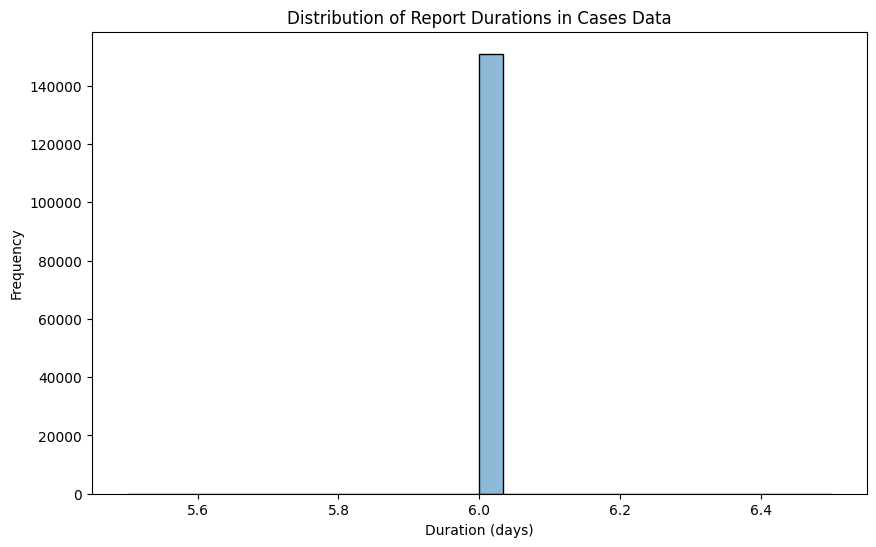

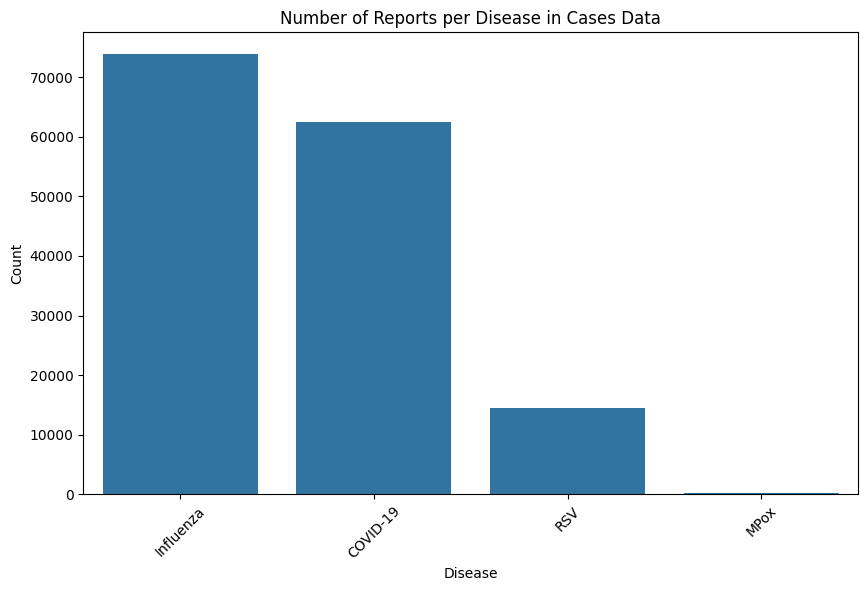

In [ ]:
# Cases Data Visualizations
if cases_df is not None:
    # Histogram of report durations
    plt.figure(figsize=(10, 6))
    sns.histplot(cases_df['report_duration'].dt.days, bins=30, kde=True)
    plt.title('Distribution of Report Durations in Cases Data')
    plt.xlabel('Duration (days)')
    plt.ylabel('Frequency')
    plt.show()

    # Count plot of diseases
    plt.figure(figsize=(10, 6))
    sns.countplot(data=cases_df, x='disease', order=cases_df['disease'].value_counts().index)
    plt.title('Number of Reports per Disease in Cases Data')
    plt.xlabel('Disease')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

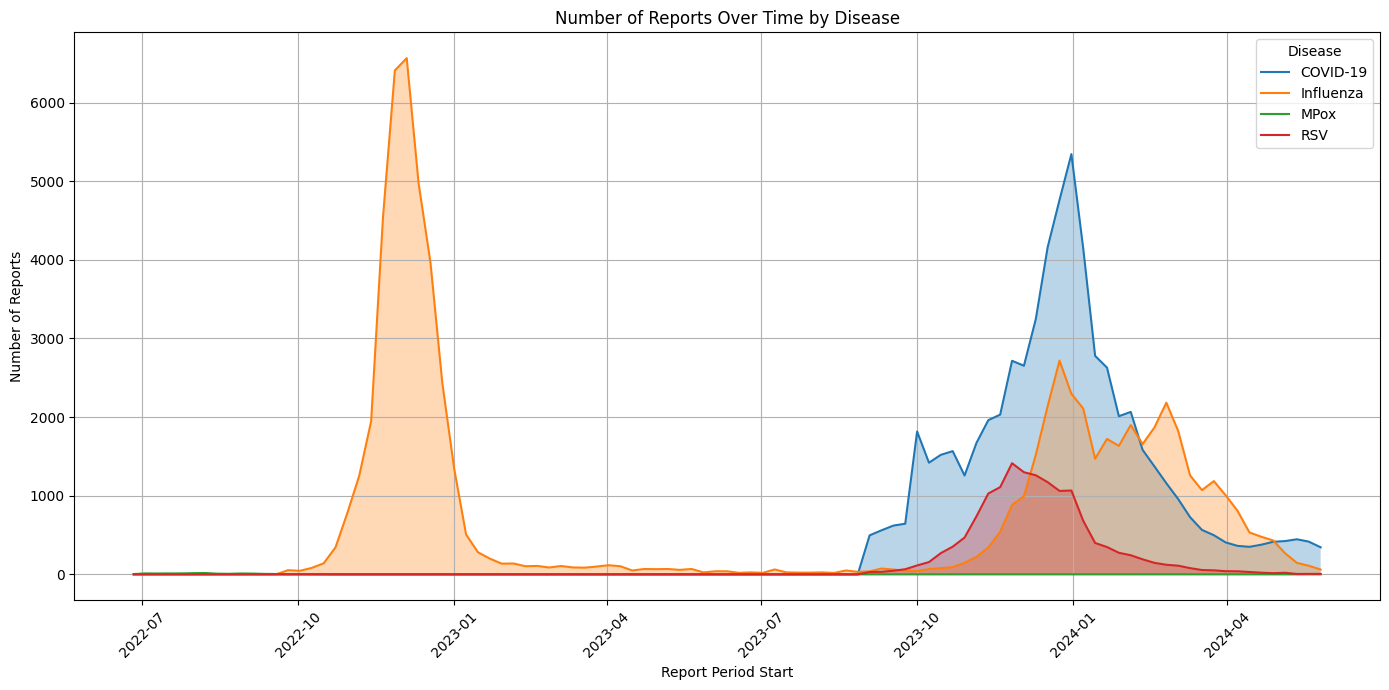

In [ ]:
# Group by reportperiodstart and disease, then count the number of reports
if cases_df is not None:
    disease_counts = cases_df.groupby(['reportperiodstart', 'disease']).size().unstack(fill_value=0)

    # Plot the time series for each disease
    plt.figure(figsize=(14, 7))
    for disease in disease_counts.columns:
        plt.plot(disease_counts.index, disease_counts[disease], label=disease)
        plt.fill_between(disease_counts.index, disease_counts[disease], alpha=0.3)

    plt.title('Number of Reports Over Time by Disease')
    plt.xlabel('Report Period Start')
    plt.ylabel('Number of Reports')
    plt.legend(title='Disease')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Something is wrong with the data prior to September 2023. Where are the COVID and RSV cases from 2022 and the first part of 2023?

#### Chart

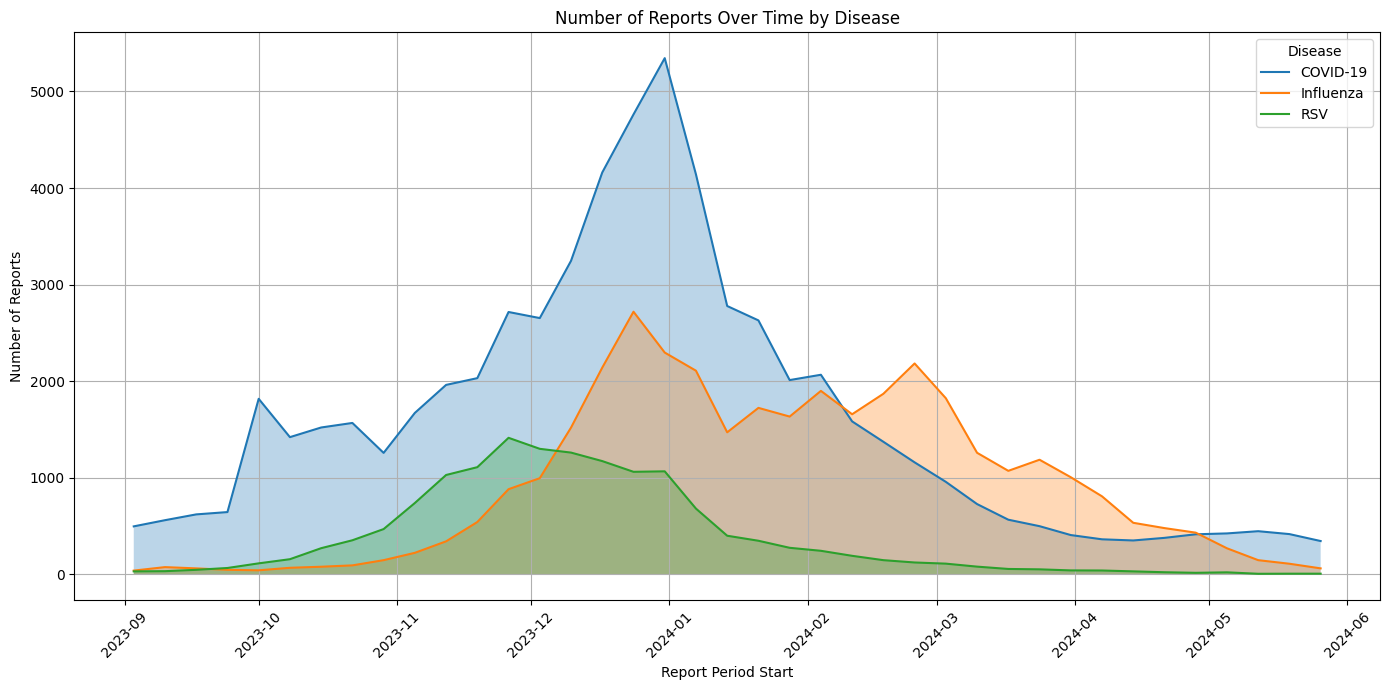

In [ ]:
# Filter the data to include only records from September 1, 2023 onwards
if cases_df is not None:
    filtered_cases_df = cases_df[cases_df['reportperiodstart'] >= '2023-09-01']

    # Group by reportperiodstart and disease, then count the number of reports
    disease_counts = filtered_cases_df.groupby(['reportperiodstart', 'disease']).size().unstack(fill_value=0)

    # Plot the time series for each disease
    plt.figure(figsize=(14, 7))
    for disease in disease_counts.columns:
        plt.plot(disease_counts.index, disease_counts[disease], label=disease)
        plt.fill_between(disease_counts.index, disease_counts[disease], alpha=0.3)

    plt.title('Number of Reports Over Time by Disease')
    plt.xlabel('Report Period Start')
    plt.ylabel('Number of Reports')
    plt.legend(title='Disease')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Connecticut Flu & COVID
Vaccinations

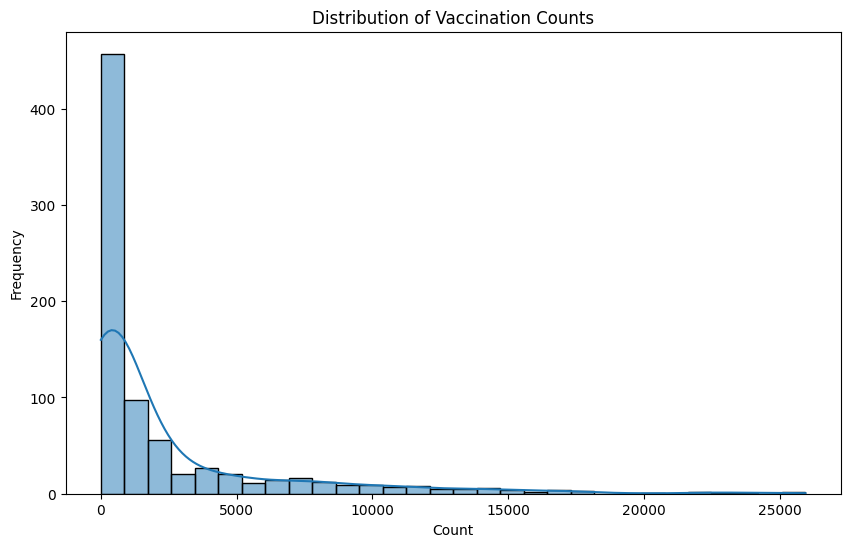

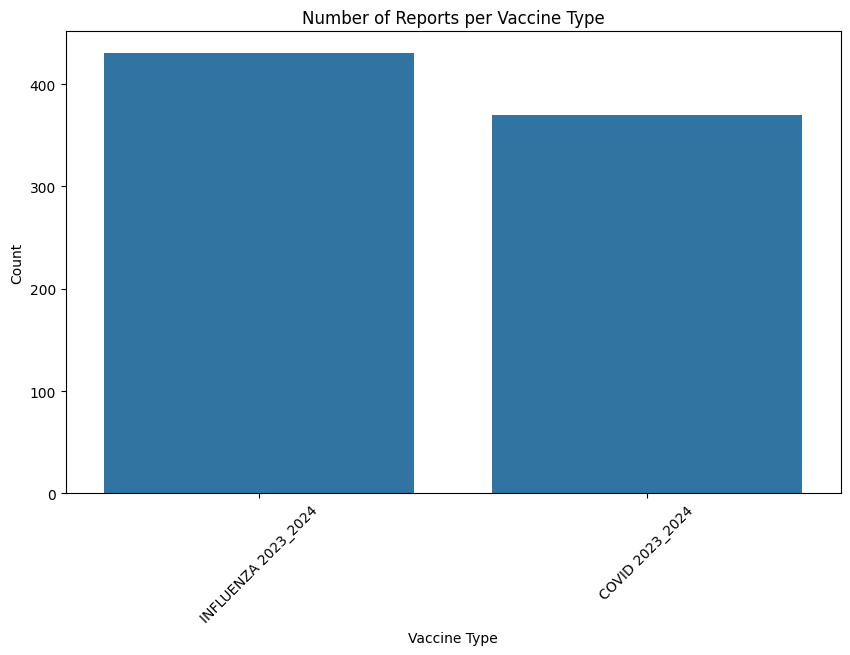

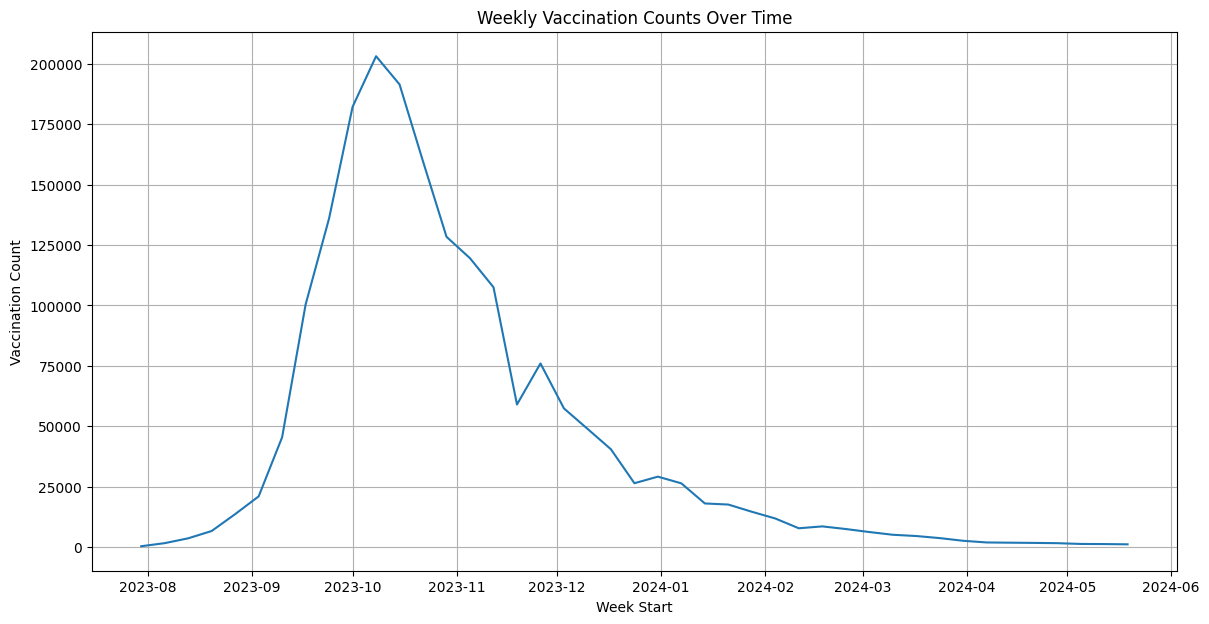

In [ ]:
# Vaccinations Data Visualizations
if vaccinations_df is not None:
    # Histogram of counts
    plt.figure(figsize=(10, 6))
    sns.histplot(vaccinations_df['count'], bins=30, kde=True)
    plt.title('Distribution of Vaccination Counts')
    plt.xlabel('Count')
    plt.ylabel('Frequency')
    plt.show()

    # Count plot of vaccine types
    plt.figure(figsize=(10, 6))
    sns.countplot(data=vaccinations_df, x='vaccinetype', order=vaccinations_df['vaccinetype'].value_counts().index)
    plt.title('Number of Reports per Vaccine Type')
    plt.xlabel('Vaccine Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

    # Time series plot of vaccination counts by week
    vaccinations_df['weekstart'] = pd.to_datetime(vaccinations_df['weekstart'])
    weekly_counts = vaccinations_df.groupby('weekstart')['count'].sum().reset_index()
    plt.figure(figsize=(14, 7))
    plt.plot(weekly_counts['weekstart'], weekly_counts['count'])
    plt.title('Weekly Vaccination Counts Over Time')
    plt.xlabel('Week Start')
    plt.ylabel('Vaccination Count')
    plt.grid(True)
    plt.show()

In [ ]:
# Filter the data for Influenza and COVID vaccinations
if vaccinations_df is not None:
    influenza_df = vaccinations_df[vaccinations_df['vaccinetype'].str.contains('INFLUENZA')]
    covid_df = vaccinations_df[vaccinations_df['vaccinetype'].str.contains('COVID')]

    # Group by weekstart and agegroup, then sum the counts
    influenza_grouped = influenza_df.groupby(['weekstart', 'agegroup'])['count'].sum().unstack(fill_value=0)
    covid_grouped = covid_df.groupby(['weekstart', 'agegroup'])['count'].sum().unstack(fill_value=0)

#### Flu Chart

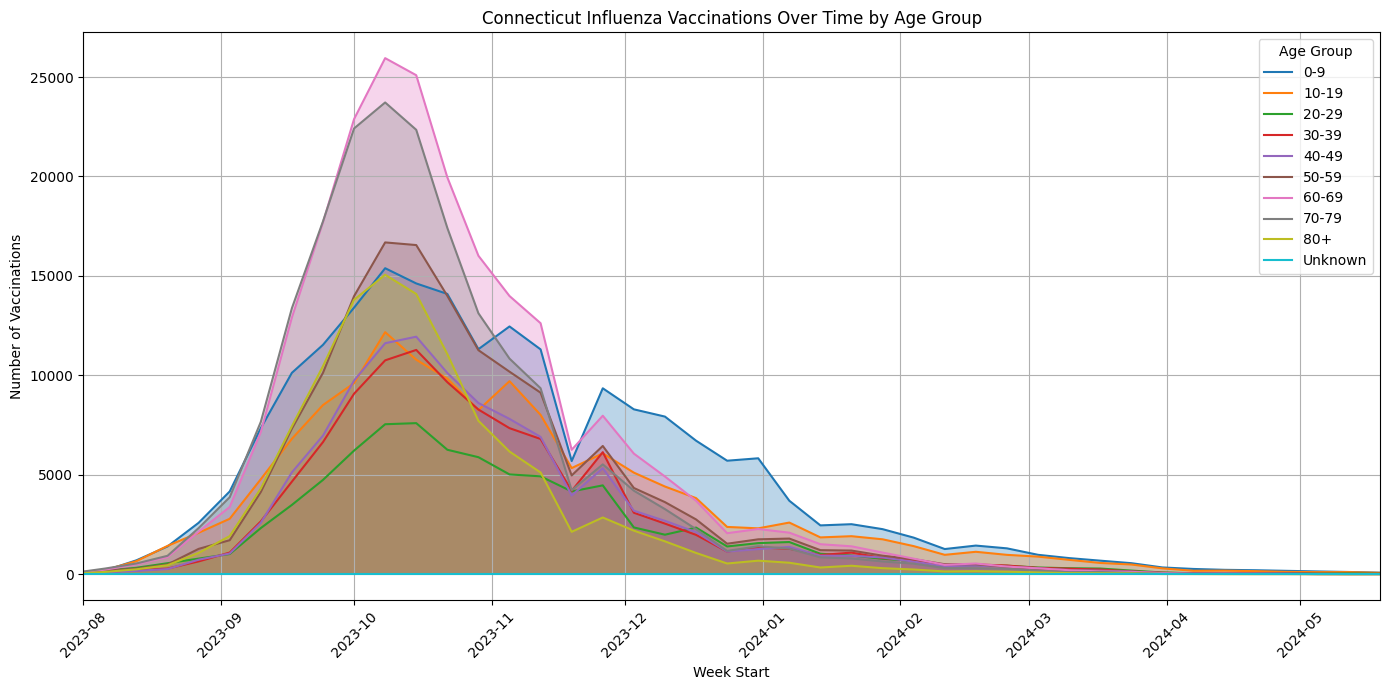

In [ ]:
    # Set the start date for the x-axis
    start_date = pd.to_datetime('2023-08-01')

    # Plot the time series for Influenza by age group
    plt.figure(figsize=(14, 7))
    for age_group in influenza_grouped.columns:
        plt.plot(influenza_grouped.index, influenza_grouped[age_group], label=age_group)
        plt.fill_between(influenza_grouped.index, influenza_grouped[age_group], alpha=0.3)
    plt.title('Connecticut Influenza Vaccinations Over Time by Age Group')
    plt.xlabel('Week Start')
    plt.ylabel('Number of Vaccinations')
    plt.legend(title='Age Group')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.xlim(start_date, influenza_grouped.index.max())
    plt.tight_layout()
    plt.show()

#### COVID Chart

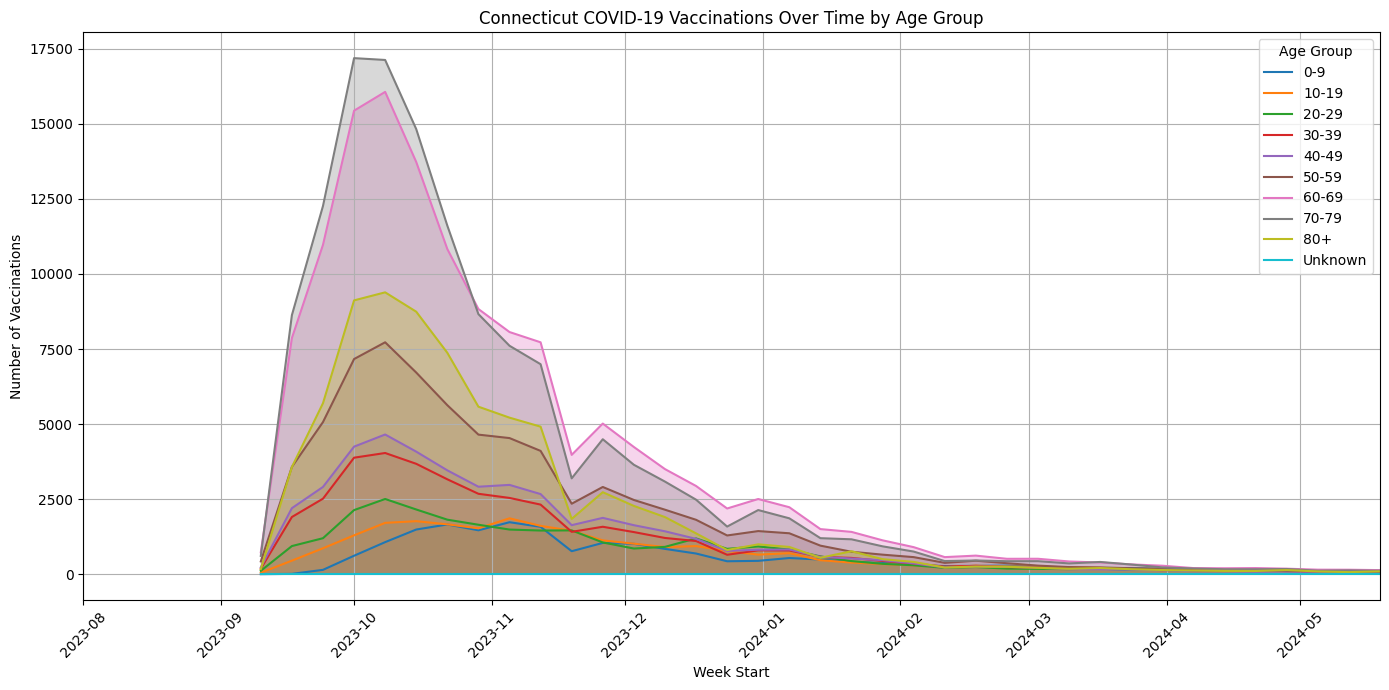

In [ ]:
    # Plot the time series for COVID by age group
    plt.figure(figsize=(14, 7))
    for age_group in covid_grouped.columns:
        plt.plot(covid_grouped.index, covid_grouped[age_group], label=age_group)
        plt.fill_between(covid_grouped.index, covid_grouped[age_group], alpha=0.3)
    plt.title('Connecticut COVID-19 Vaccinations Over Time by Age Group')
    plt.xlabel('Week Start')
    plt.ylabel('Number of Vaccinations')
    plt.legend(title='Age Group')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.xlim(start_date, covid_grouped.index.max())
    plt.tight_layout()
    plt.show()

## NVSS Death Data

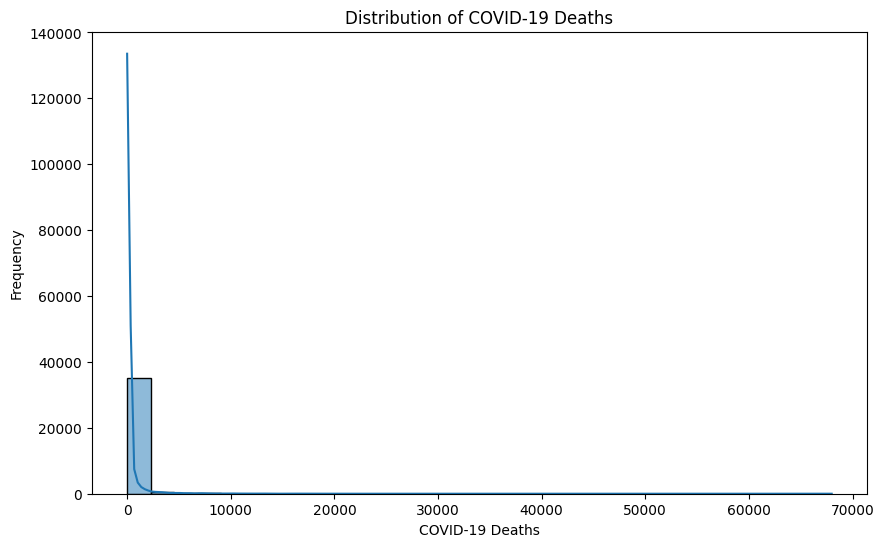

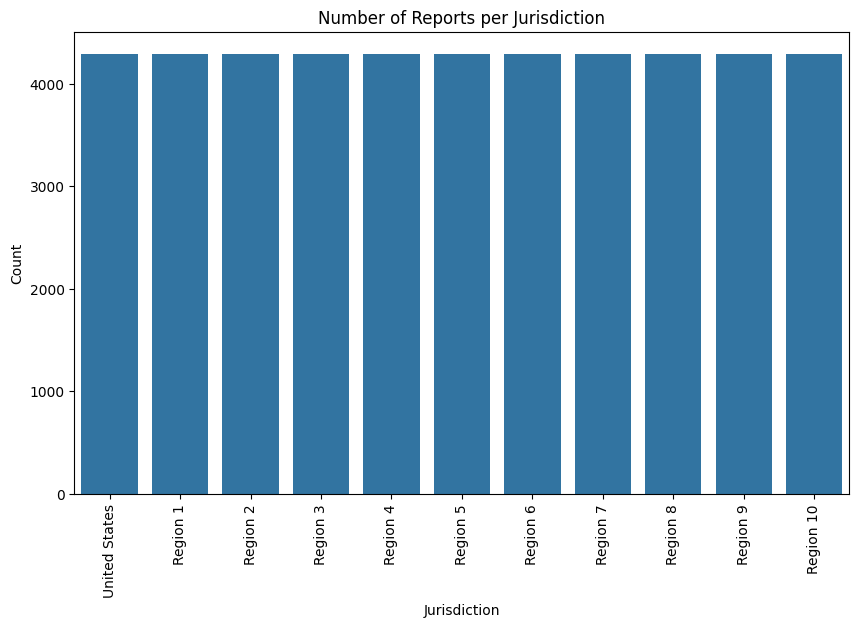

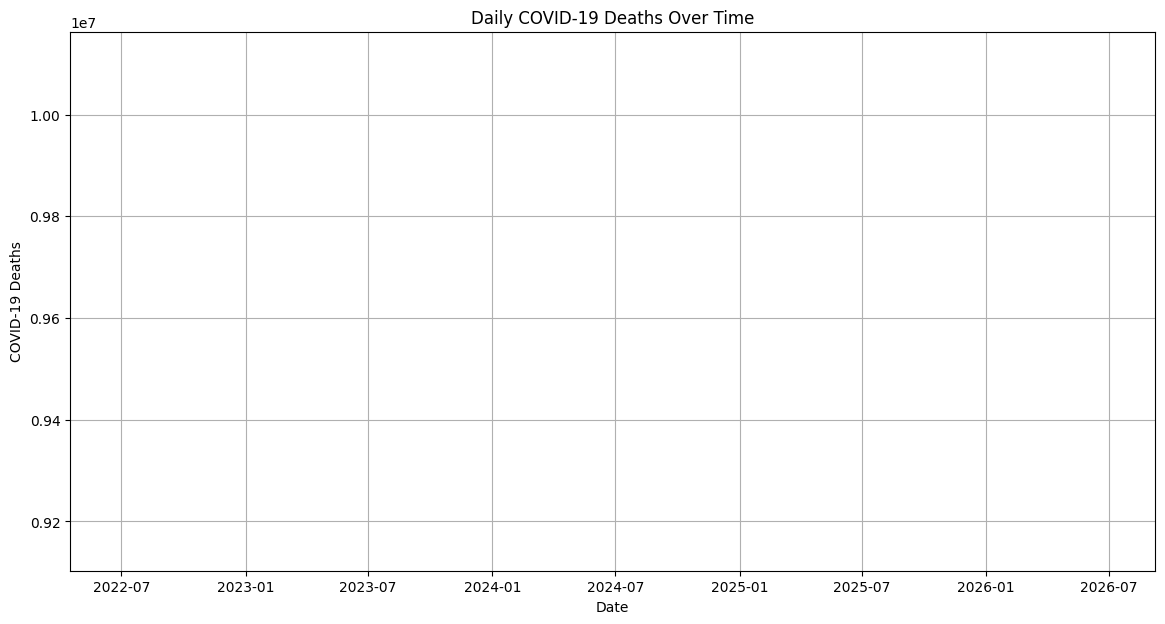

In [ ]:
# Deaths Data Visualizations
if deaths_df is not None:
    # Histogram of COVID deaths
    plt.figure(figsize=(10, 6))
    sns.histplot(deaths_df['covid_deaths'].dropna(), bins=30, kde=True)
    plt.title('Distribution of COVID-19 Deaths')
    plt.xlabel('COVID-19 Deaths')
    plt.ylabel('Frequency')
    plt.show()

    # Count plot of jurisdictions
    plt.figure(figsize=(10, 6))
    sns.countplot(data=deaths_df, x='jurisdiction_residence', order=deaths_df['jurisdiction_residence'].value_counts().index)
    plt.title('Number of Reports per Jurisdiction')
    plt.xlabel('Jurisdiction')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

    # Time series plot of COVID-19 deaths over time
    deaths_df['data_as_of'] = pd.to_datetime(deaths_df['data_as_of'])
    daily_deaths = deaths_df.groupby('data_as_of')['covid_deaths'].sum().reset_index()
    plt.figure(figsize=(14, 7))
    plt.plot(daily_deaths['data_as_of'], daily_deaths['covid_deaths'])
    plt.title('Daily COVID-19 Deaths Over Time')
    plt.xlabel('Date')
    plt.ylabel('COVID-19 Deaths')
    plt.grid(True)
    plt.show()

#### Totals Chart

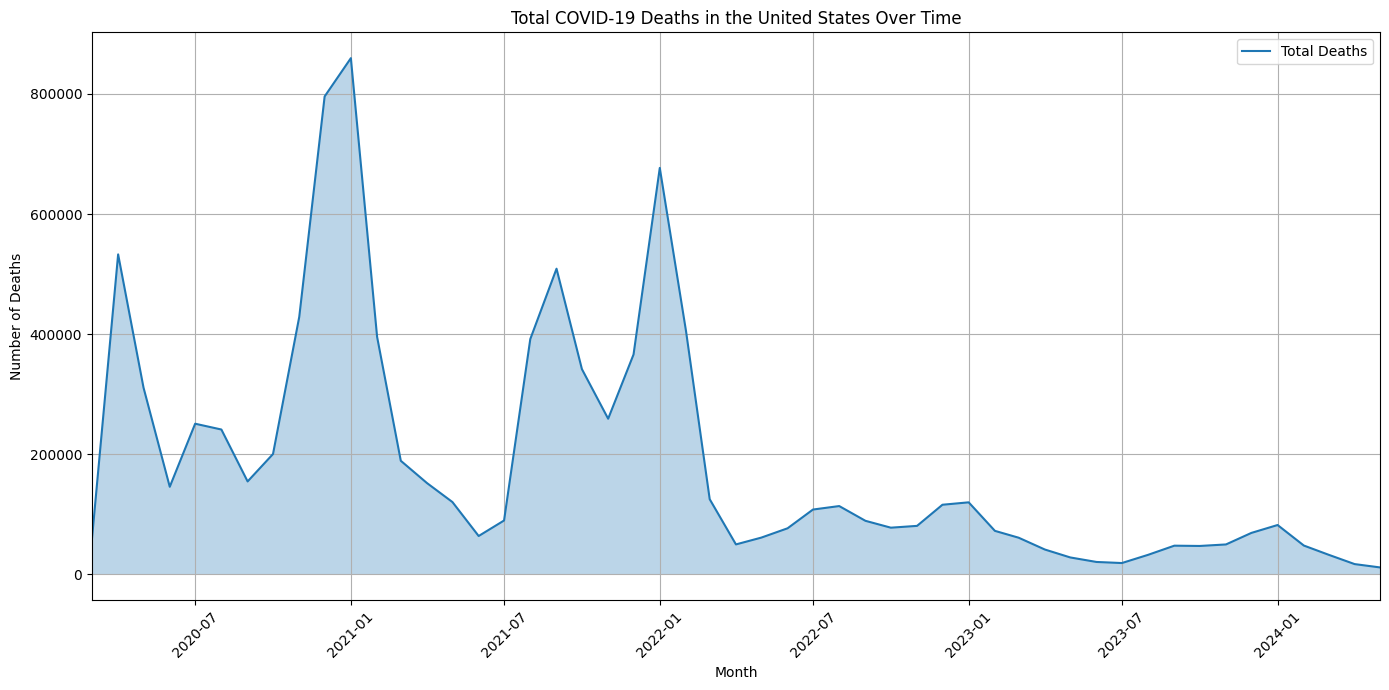

In [ ]:
# Combine year and month to create a datetime column for plotting
if deaths_df is not None:
    # Ensure 'year' and 'month' columns are in string format to concatenate
    deaths_df['year'] = deaths_df['year'].astype(str)
    deaths_df['month'] = deaths_df['month'].astype(str)

    # Create a new 'date' column by combining year and month
    deaths_df['date'] = pd.to_datetime(deaths_df['year'] + '-' + deaths_df['month'] + '-01')

    # Total deaths over time
    total_deaths = deaths_df.groupby('date')['covid_deaths'].sum().reset_index()

    # Set the start date for the x-axis
    start_date = pd.to_datetime('2020-03-01')

    plt.figure(figsize=(14, 7))
    plt.plot(total_deaths['date'], total_deaths['covid_deaths'], label='Total Deaths')
    plt.fill_between(total_deaths['date'], total_deaths['covid_deaths'], alpha=0.3)
    plt.title('Total COVID-19 Deaths in the United States Over Time')
    plt.xlabel('Month')
    plt.ylabel('Number of Deaths')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.xlim(start_date, total_deaths['date'].max())
    plt.tight_layout()
    plt.show()

In [ ]:
# Display the unique values in the 'jurisdiction_residence' column
if deaths_df is not None:
    unique_jurisdictions = deaths_df['jurisdiction_residence'].unique()
    print("Unique values in 'jurisdiction_residence':")
    print(unique_jurisdictions)

Unique values in 'jurisdiction_residence':
['United States' 'Region 1' 'Region 2' 'Region 3' 'Region 4' 'Region 5'
 'Region 6' 'Region 7' 'Region 8' 'Region 9' 'Region 10']


#### By Region Chart

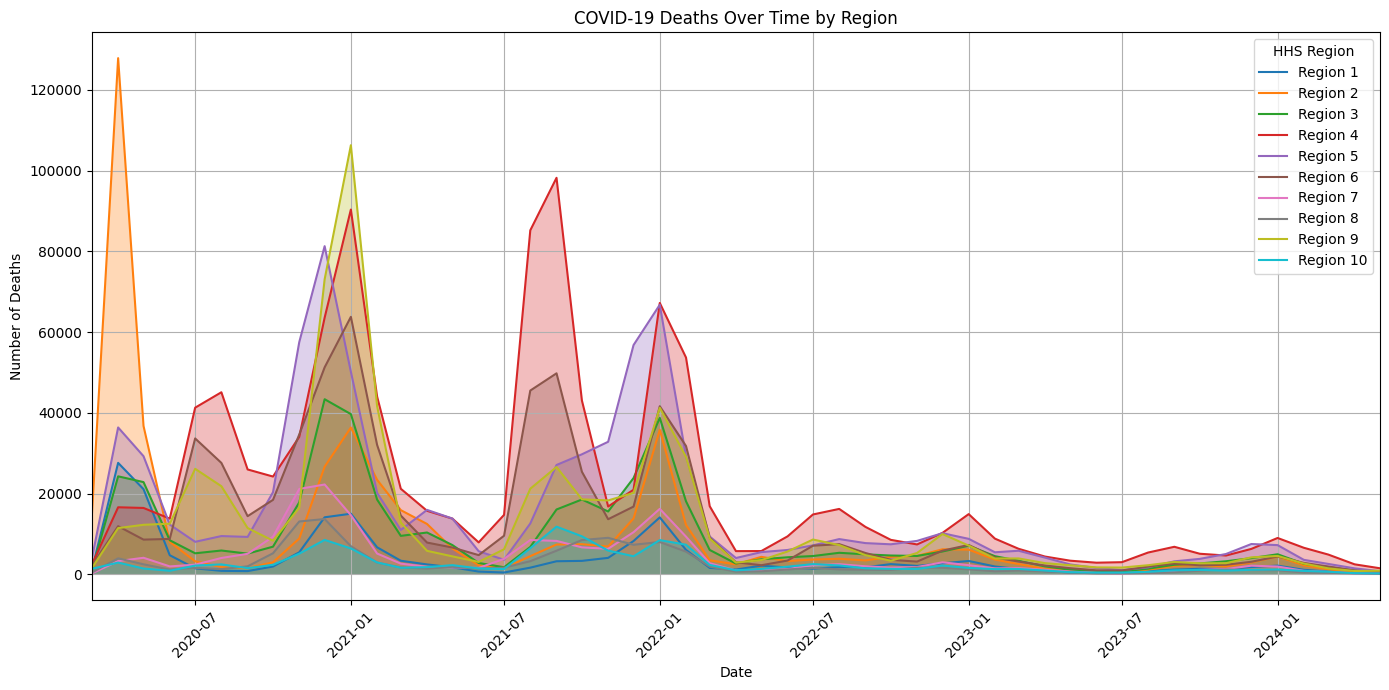

In [ ]:
    # Filter out the 'United States' value
    filtered_deaths_df = deaths_df[deaths_df['jurisdiction_residence'] != 'United States']

    # Group by 'date' and 'jurisdiction_residence', then sum the covid_deaths
    region_deaths = filtered_deaths_df.groupby(['date', 'jurisdiction_residence'])['covid_deaths'].sum().unstack(fill_value=0)

    # Sort regions to ensure correct legend order
    sorted_regions = sorted(region_deaths.columns, key=lambda x: int(x.split()[-1]))

    # Plot the time series for each region
    plt.figure(figsize=(14, 7))
    for region in sorted_regions:
        plt.plot(region_deaths.index, region_deaths[region], label=region)
        plt.fill_between(region_deaths.index, region_deaths[region], alpha=0.3)
    plt.title('COVID-19 Deaths Over Time by Region')
    plt.xlabel('Date')
    plt.ylabel('Number of Deaths')
    plt.legend(title='HHS Region', loc='upper right')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.xlim(start_date, total_deaths['date'].max())
    plt.tight_layout()
    plt.show()

#### By Age Group Chart

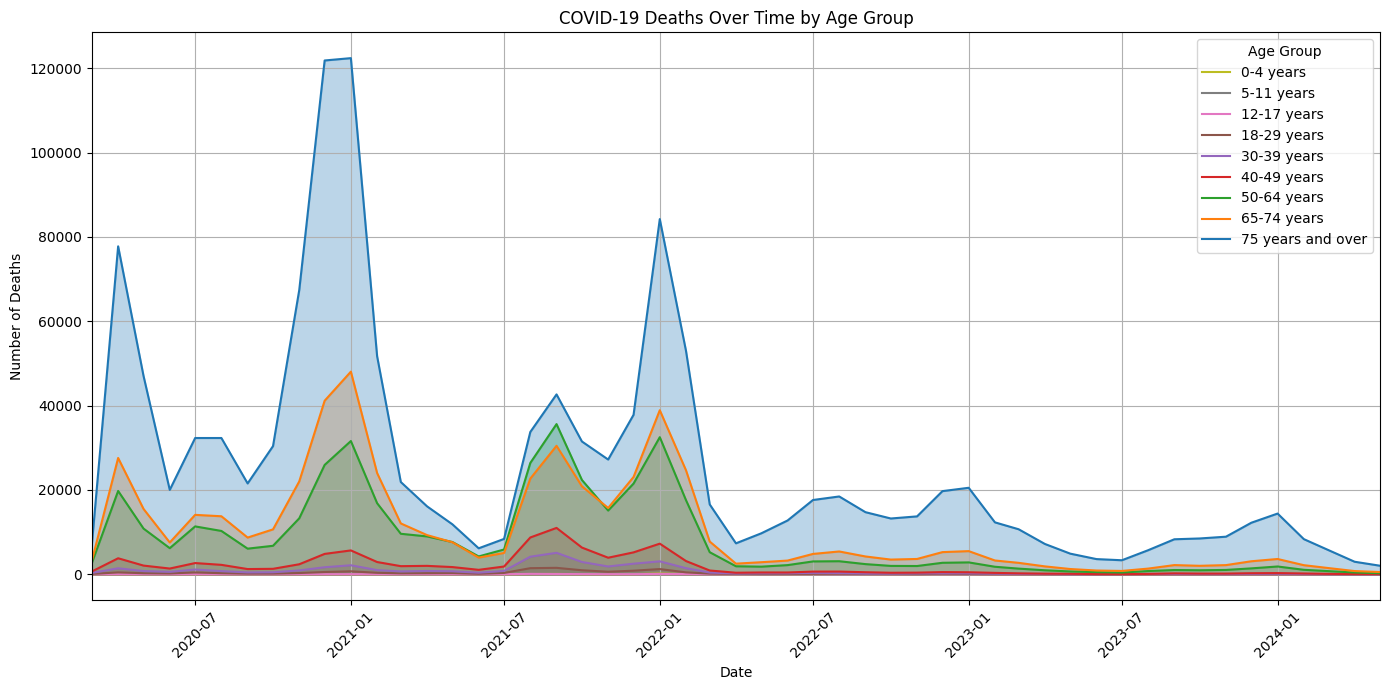

In [ ]:
# Filter the data to include only records where 'group' is 'Age'
age_deaths_df = deaths_df[deaths_df['group'] == 'Age']

# Group by 'date' and 'subgroup1', then sum the covid_deaths
age_group_deaths = age_deaths_df.groupby(['date', 'subgroup1'])['covid_deaths'].sum().unstack(fill_value=0)

# Define the correct order for age groups
age_order = [
    '0-4 years', '5-11 years', '12-17 years', '18-29 years',
    '30-39 years', '40-49 years', '50-64 years', '65-74 years',
    '75 years and over'
]

# Reindex the DataFrame to ensure the columns are in the correct order
age_group_deaths = age_group_deaths.reindex(columns=age_order)

# Define the color palette and invert the order
colors = sns.color_palette("tab10", len(age_order))[::-1]

# Plot the time series for each age subgroup
plt.figure(figsize=(14, 7))
for i, age_group in enumerate(age_order):
    plt.plot(age_group_deaths.index, age_group_deaths[age_group], label=age_group, color=colors[i])
    plt.fill_between(age_group_deaths.index, age_group_deaths[age_group], alpha=0.3, color=colors[i])
plt.title('COVID-19 Deaths Over Time by Age Group')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.legend(title='Age Group', loc='upper right')
plt.xticks(rotation=45)
plt.grid(True)
plt.xlim(start_date, age_group_deaths.index.max())
plt.tight_layout()
plt.show()

#### Age Group Stacked Area Chart

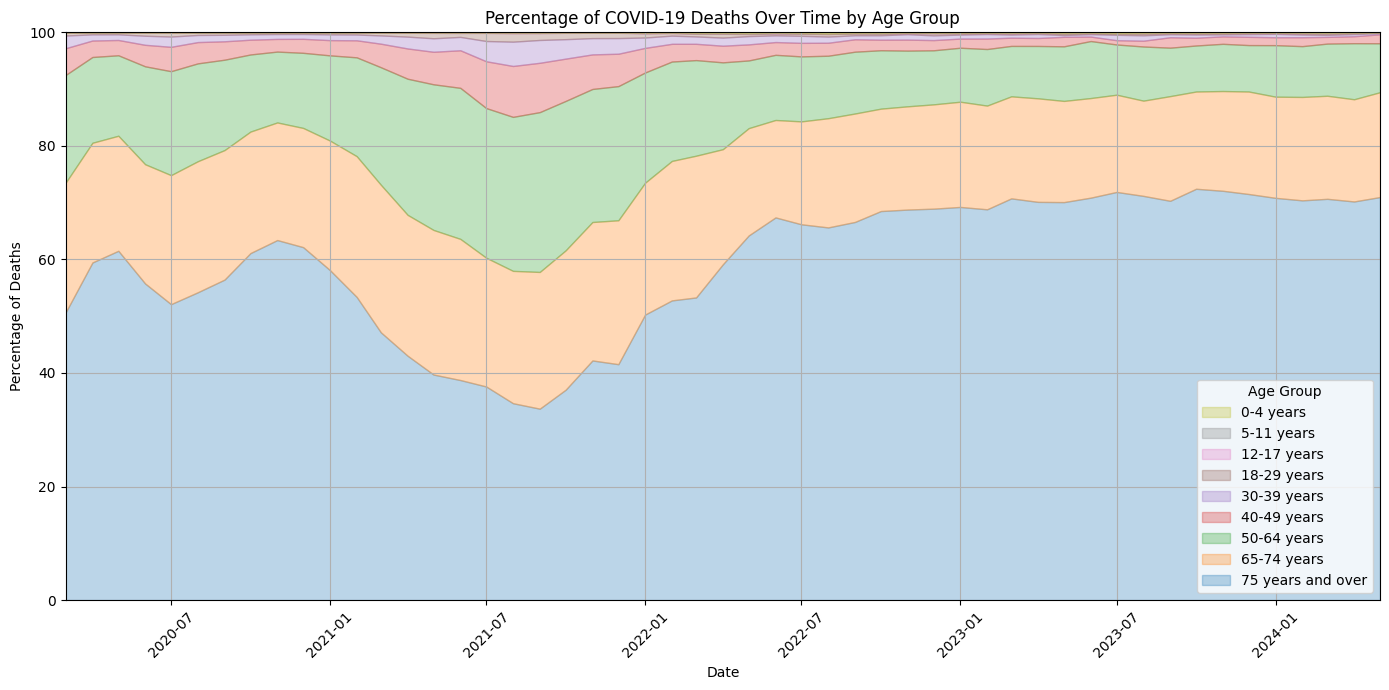

In [ ]:
# Define the color palette
colors = sns.color_palette("tab10", len(age_order))

# Calculate the percentage of deaths for each age group
age_group_deaths_percent = age_group_deaths.div(age_group_deaths.sum(axis=1), axis=0) * 100

# Plot the stacked area chart
plt.figure(figsize=(14, 7))

# Initialize the bottom array for stacking
bottom = np.zeros(len(age_group_deaths_percent))

# Plot each age group area in reverse order
for i, age_group in enumerate(age_order[::-1]):
    plt.fill_between(age_group_deaths_percent.index, bottom, bottom + age_group_deaths_percent[age_group],
                     alpha=0.3, color=colors[i], label=age_group)
    bottom += age_group_deaths_percent[age_group]

# Set plot attributes
plt.title('Percentage of COVID-19 Deaths Over Time by Age Group')
plt.xlabel('Date')
plt.ylabel('Percentage of Deaths')
plt.xticks(rotation=45)
plt.grid(True)
plt.xlim(start_date, age_group_deaths.index.max())
plt.ylim(0, 100)

# Manually create the legend to ensure correct order
handles, labels = plt.gca().get_legend_handles_labels()
order = list(range(len(age_order)))[::-1]  # Reverse the order for the legend
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], title='Age Group', loc='lower right')

plt.tight_layout()
plt.show()